In [1]:
import snntorch as snn
import torch

In [4]:
# Training Parameters
batch_size = 128
data_path='/tmp/data/mnist'
num_classes = 10 #MNIST has 10 output cases [0-9]

# Torch Variables
dtype = torch.float

In [5]:
# Download Dataset

from torchvision import datasets, transforms

# Define a transform
transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

100.0%
100.0%
100.0%
100.0%


In [7]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)
print(f"The size of the mnist_train is {len(mnist_train)}")

The size of the mnist_train is 600


In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

In [11]:
# Rate Coding of MNIST

# Temporal Dynamics
num_steps = 100

# create vector filled with 0.5
raw_vector = torch.ones(num_steps)*0.5

# pass each sample through a Bernoulli trial
rate_coded_vector = torch.bernoulli(raw_vector)
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 46.00% of the time.


In [13]:
from snntorch import spikegen

# Iterate through minibatches
data = iter(train_loader)
data_it, targets_it = next(data)

# Spiking Data
spike_data = spikegen.rate(data_it, num_steps=num_steps)
print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


In [15]:
# Animation
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())
torch.Size([100, 28, 28])

torch.Size([100, 28, 28])


torch.Size([100, 28, 28])

the corresponding target is: 0


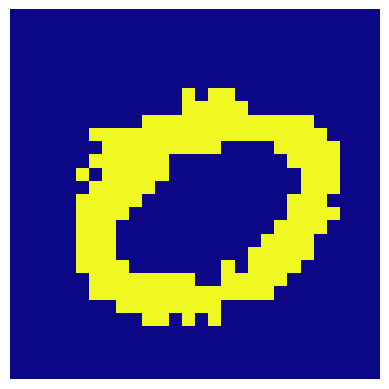

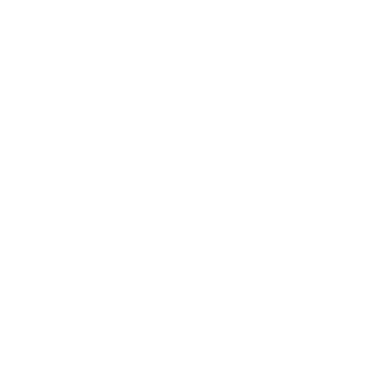

In [24]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

HTML(anim.to_html5_video())
anim.save("spike_mnist_first_test.mp4")
print(f"the corresponding target is: {targets_it[0]}")
spike_data = spikegen.rate(data_it, num_steps=num_steps, gain=0.5)

spike_data_sample2 = spike_data[:, 0, 0]
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample2, fig, ax)
HTML(anim.to_html5_video())

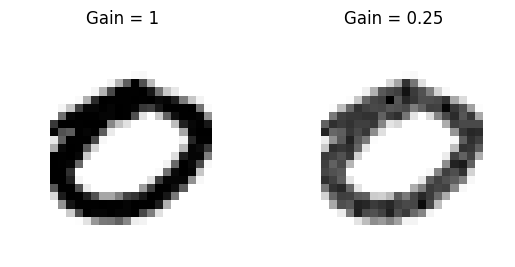

In [22]:
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((28, -1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 1')

plt.subplot(1,2,2)
plt.imshow(spike_data_sample2.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 0.25')

plt.show()

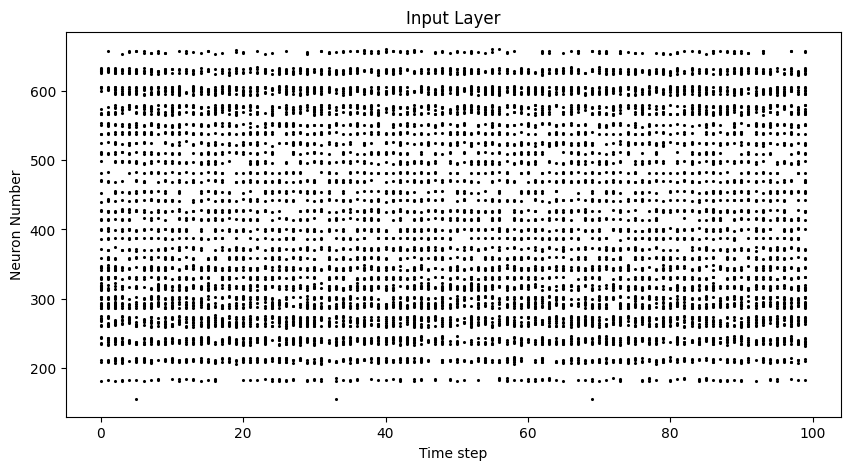

In [23]:
# Raster plots

# Reshape
spike_data_sample2 = spike_data_sample2.reshape((num_steps, -1))

# raster plot
fig = plt.figure(facecolor='w', figsize=(10,5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2, ax, s=1.5, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

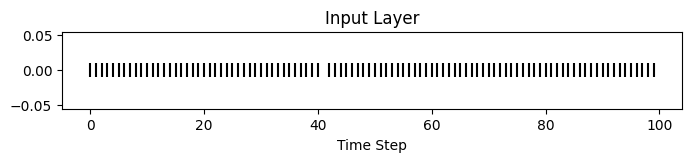

In [28]:
idx = 210 # index 210th neuron

fig = plt.figure(facecolor="w", figsize=(8,1))
ax = fig.add_subplot(111)

splt.raster(spike_data_sample.reshape(num_steps, -1)[:, idx].unsqueeze(1), ax, s=100, c="black", marker="|")
plt.title("Input Layer")
plt.xlabel("Time Step")
plt.show()
